In [12]:
import numpy as np
import os
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import axes3d
from  PIL import Image
from time import time
from torch import nn
from torchvision import models
from torchvision import transforms
from torchvision import datasets
from torch.utils.data.dataset import Dataset
from torchsummary import summary

torch.cuda.is_available()

False

In [13]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [27]:

resnet = models.resnet101(pretrained=True)
# freeze all base layers; Parameters of newly constructed modules have requires_grad=True by default
for param in resnet.parameters():
    param.requires_grad = False
num_ftrs = resnet.fc.in_features

# add final layers tot he network
resnet.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1000),
    nn.Linear(1000,3)
    )
    # verify the network end looks like
summary(resnet, input_size= (3,244,244))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]           4,096
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
           Conv2d-11          [-1, 256, 61, 61]          16,384
      BatchNorm2d-12          [-1, 256, 61, 61]             512
           Conv2d-13          [-1, 256, 61, 61]          16,384
      BatchNorm2d-14          [-1, 256,

In [15]:
def load_images_from_folder(folder, end, as_tensor = False):
        
    images = []
    files = folders = 0
    # count denotes the number of folders to search through
    count= 0
    dirnames = [] 

 

    for _, dirnames, filenames in os.walk(folder):

 

        if dirnames != []:
            subfolders = dirnames
        current_path = os.path.join(folder, subfolders[count])  
        for filename in os.listdir(current_path):
            img = Image.open(os.path.join(current_path, filename))
            if img is not None:
                if as_tensor:
                    img = torch.from_numpy(img * 1.0)
                    # img = torch.from_numpy(img).float()
                    images.append(img)
                else: 
                    images.append(img)

 

        count += 1
        
        if count  == end:
            return images
        
    return images


def show_image(PIL_img):
    PIL_img.show()



In [16]:
path = r"D:\Pablo\Uni Work\uob_image_set\uob_image_set"

N_CHANNELS = 3




images = load_images_from_folder(path, 3, as_tensor= False)
full_loader = torch.utils.data.DataLoader(images, shuffle=False, num_workers=os.cpu_count())
print(full_loader)

In [17]:
def imshow(input, title=None):
    """Imshow for Tensor."""
    input = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

    # Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

NameError: name 'dataloaders' is not defined

In [18]:


# mean = torch.zeros(1)
# std = torch.zeros(1)
# print('==> Computing mean and std..')
# for inputs in tqdm(full_loader):
#     print(inputs.shape)
#     print(inputs)
#     for i in range(N_CHANNELS):
#         print(inputs[:,:,:,i].shape)
#         mean[i] += inputs[:,:,:,i].mean()
#         std[i] += inputs[:,:,:,i].std()
# mean.div_(len(dataset))
# std.div_(len(dataset))
# print(mean, std)

In [20]:
# using the mean and std values form the ImageNet data for which it was pretrained
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], 
            std=[0.229, 0.224, 0.225]
        )])


In [25]:



list_input_tensor = []
list_input_batch = []
num_img = 3
for item in range(num_img):
    input_tensor = preprocess(images[item])
    input_batch = input_tensor.unsqueeze(0)
    list_input_tensor.append(input_tensor)
    list_input_batch.append(input_batch)

In [28]:
output_array = []
for i in range(len(list_input_batch)):
    if torch.cuda.is_available():
        input_batch = list_input_batch[i].to('cuda')
        resnet.to('cuda')
    
    with torch.no_grad():
        output = resnet(input_batch)
        cup_tensor = output.cpu()
        
    output_array.append(cup_tensor[0].tolist())

output_array = np.asarray(output_array)
display(output_array)

array([[-0.29467443,  0.23089714, -0.20402879],
       [-0.29467443,  0.23089714, -0.20402879],
       [-0.29467443,  0.23089714, -0.20402879]])

[-0.29467443 -0.29467443 -0.29467443]


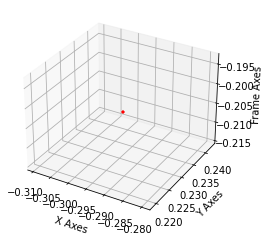

In [33]:
print(output_array[:,0])
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(output_array[:,0], output_array[:,1], output_array[:,2],color='r',s=3)
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')

plt.show()

In [1]:
# set CNN in  inference mode
resnet.eval()




CommandNotFoundError: No command 'conda isntall'.
Did you mean 'conda install'?

